# Chapter 2
## XGBoost Quick Start Guide with Iris data Case Study 
This notebook is a companion to the book _XGBoost for Regression Predictive Modeling and Time Series Analysis_.
This chapter is a quick start guide designed to give you hands-on experience using XGBoost in Python and get you started. We will present source code and walk you through the steps of ingesting data, training a model, and making a prediction.

## Iris data classifier
In the case of the iris dataset we have numeric measurements of iris flower characteristics and a column with the type of iris these data are from. We will train a model to classify the type of iris flower based on the measurements of the petals and sepals.

# Setting up the python environment and ingesting the iris dataset

In [4]:
# ----------------------------------------
# filename irisclassifier.ipynb
# purpose classify iris flowers by species based on measurements of the sepal and petal
# author Joyce Weiner
# revision 1.0
# revision history 1.0 - initial script
# ----------------------------------------

import pandas as pd
import numpy as np


In [5]:
# load the iris data set from scikit-learn
from sklearn import datasets

irisarray = datasets.load_iris()

In [6]:
print(irisarray)


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [7]:
# bring the array into a pandas dataframe and label the headers
# have to concatenate the data and the target -- which is already converted from words to numbers
irisdata = pd.DataFrame(np.c_[irisarray['data'], irisarray['target']], columns = irisarray['feature_names'] + ['Species'])
irisdata['Species'] = irisdata['Species'].astype(int)


In [8]:
irisdata.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Exploring the dataset by making graphs 
Next, we want to take a look at the dataset to check for missing data or other problems. To do this we'll make some plots using Seaborn.
First, we want to check that there are an even number of observations for each of the three species type. We do this by making a bar graph.
I'm setting the color palette to "Greys" so that the output on your screen matches what's printed in the book. While color is fun, it also districts the viewer from the data. According to Edward Tufte, a leading expert in data visualization, we should stive to show the data "above all else" when making graphs. 

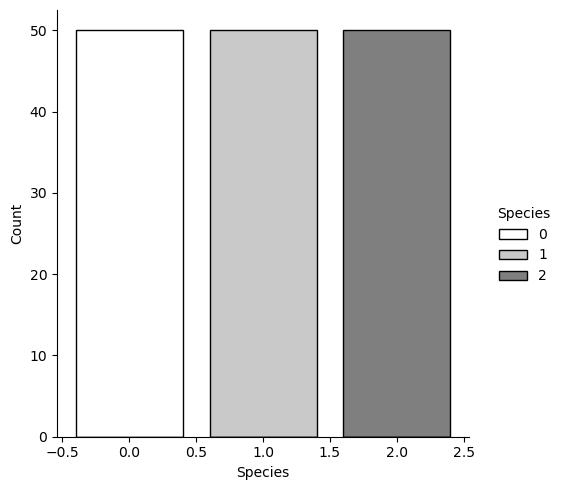

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(irisdata, x="Species", discrete = True, hue="Species", shrink =0.8, palette="Greys")


Next, we want to look at each parameter, comparing between the species. To do this we'll build a grid of four box plots.

<Axes: xlabel='Species', ylabel='petal width (cm)'>

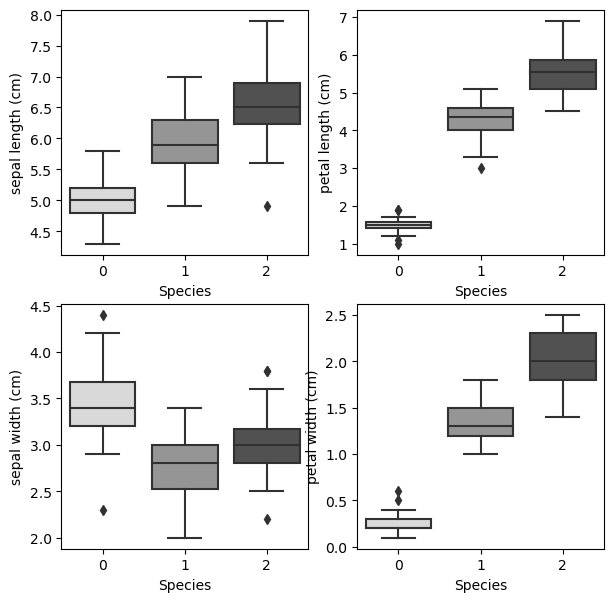

In [10]:
fig, axes = plt.subplots(2,2, figsize=(7,7))
sns.boxplot(ax=axes[0,0], data = irisdata, x="Species", y="sepal length (cm)", palette="Greys")
sns.boxplot(ax=axes[0,1], data = irisdata, x="Species", y="petal length (cm)", palette="Greys")
sns.boxplot(ax=axes[1,0], data = irisdata, x="Species", y="sepal width (cm)", palette="Greys")
sns.boxplot(ax=axes[1,1], data = irisdata, x="Species", y="petal width (cm)", palette="Greys")


## Looking for relationships with x-y plots 
Now, we want to see how the data relate to eachother by making some x-y plots. Seaborn makes this very easy to do by offering a function called pairplot.

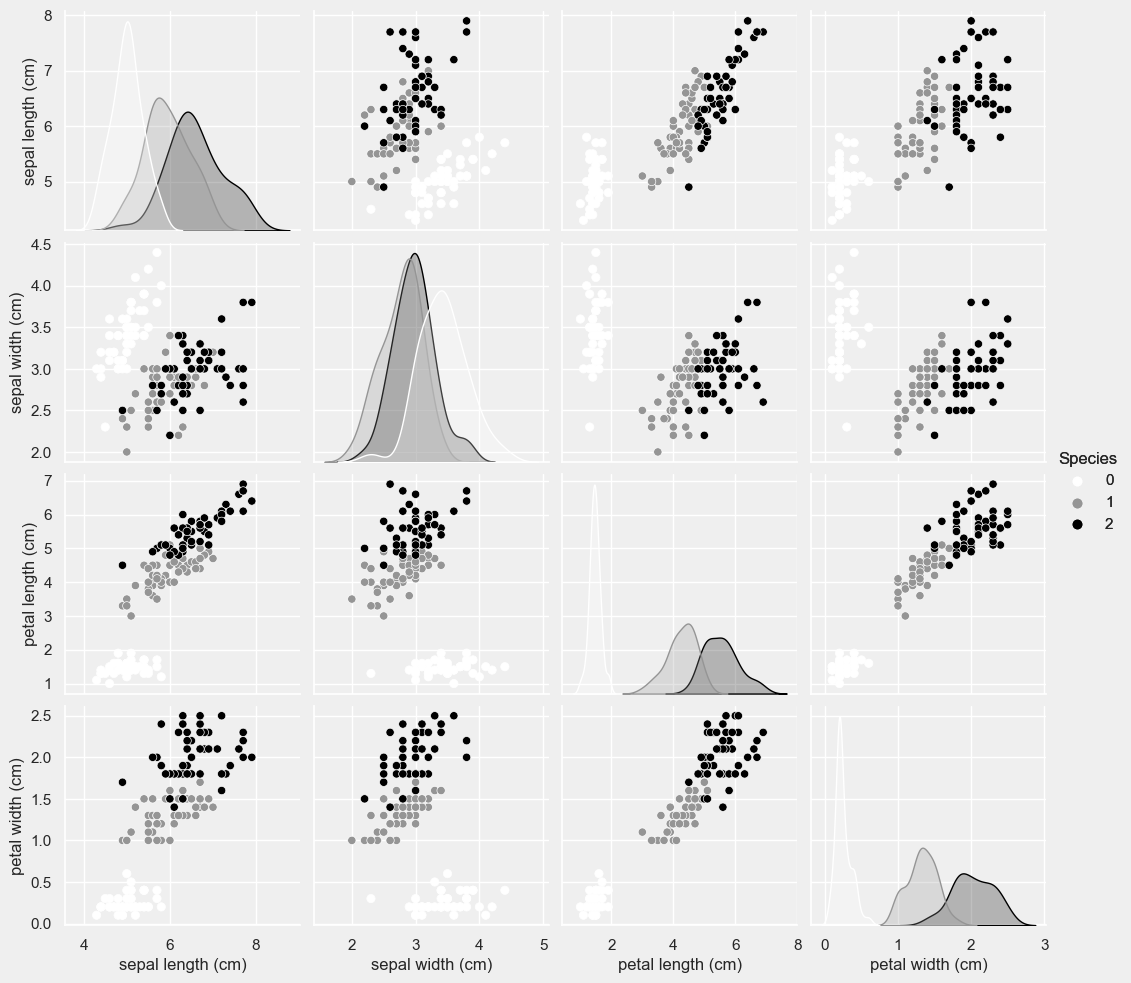

In [21]:
sns.set(rc={"axes.facecolor":"efefef","figure.facecolor":"efefef"})
graphxy = sns.pairplot(irisdata,hue="Species", palette="Greys")
graphxy.add_legend()

## Data preparation 
Next, we'll split the data into training and test sets using the scikit-learn train_test_split function

In [22]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(irisdata, test_size=0.2, random_state=17)

In [23]:
training_data.shape

(120, 5)

In [24]:
testing_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
16,5.4,3.9,1.3,0.4,0
78,6.0,2.9,4.5,1.5,1
145,6.7,3.0,5.2,2.3,2
99,5.7,2.8,4.1,1.3,1
126,6.2,2.8,4.8,1.8,2


Next, we'll set up XGBoost to perform classification using the measurement columns sepal length, sepal width, petal length and petal width as inputs or Xs and set the species as the output or y.

In [25]:
X_train= training_data [['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]

X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
29,4.7,3.2,1.6,0.2
98,5.1,2.5,3.0,1.1
37,4.9,3.6,1.4,0.1
5,5.4,3.9,1.7,0.4
81,5.5,2.4,3.7,1.0


In [26]:
y_train = training_data[['Species']]

y_train.head()

,Species
29,0
98,1
37,0
5,0
81,1


In [27]:
X_test= testing_data [['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y_test= testing_data [['Species']]

## XGBoost model settings and model training 

In [28]:
import xgboost as xgb
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

iris_classifier = xgb.XGBClassifier(eval_metric="auc")

iris_classifier.fit(X_train,y_train, eval_set=[(X_test,y_test),(X_train,y_train)])

[0]	validation_0-auc:1.00000	validation_1-auc:0.99898
[1]	validation_0-auc:1.00000	validation_1-auc:0.99836
[2]	validation_0-auc:1.00000	validation_1-auc:0.99877
[3]	validation_0-auc:1.00000	validation_1-auc:0.99887
[4]	validation_0-auc:1.00000	validation_1-auc:0.99939
[5]	validation_0-auc:1.00000	validation_1-auc:0.99949
[6]	validation_0-auc:1.00000	validation_1-auc:0.99959
[7]	validation_0-auc:1.00000	validation_1-auc:0.99980
[8]	validation_0-auc:1.00000	validation_1-auc:0.99980
[9]	validation_0-auc:1.00000	validation_1-auc:1.00000
[10]	validation_0-auc:1.00000	validation_1-auc:1.00000
[11]	validation_0-auc:1.00000	validation_1-auc:1.00000
[12]	validation_0-auc:1.00000	validation_1-auc:1.00000
[13]	validation_0-auc:1.00000	validation_1-auc:1.00000
[14]	validation_0-auc:1.00000	validation_1-auc:1.00000
[15]	validation_0-auc:1.00000	validation_1-auc:1.00000
[16]	validation_0-auc:1.00000	validation_1-auc:1.00000
[17]	validation_0-auc:1.00000	validation_1-auc:1.00000
[18]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

## Making a prediction using XGBoost 
Now our model is trained, and we can use it to classify irises based on their measurements. Let's test out how well it does on our test dataset. We use the predict method and pass it the X_test data.

In [29]:
y_score = iris_classifier.predict(X_test)

Use the model with example data not in the test or training set (inference). Say for example we've measured an iris and it has sepal length of 4.5 cm, sepal width of 3.0 cm, petal length of 1.5 cm, and petal width of 0.25 cm. Which type of iris is it?

In [30]:
X_example = np.array([4.5, 3.0, 1.5, 0.25])
X_example = X_example.reshape(1,4)
y_example = iris_classifier.predict(X_example)
print(y_example)

[0]


That's all we need to do to use the model.
Now, we look at how well the model is working. Does it correctly classify irises?

In [31]:
print(classification_report(y_test,y_score))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Confusion matrix 
 [[ 7  0  0]
 [ 0 11  0]
 [ 0  1 11]]


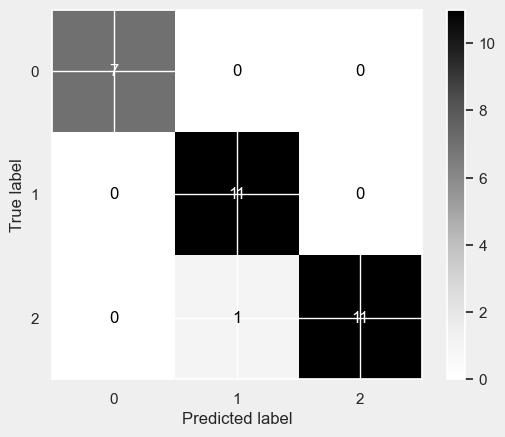

In [32]:
conf = confusion_matrix (y_test, y_score)

print ('Confusion matrix \n', conf)

ConfusionMatrixDisplay.from_predictions(y_test, y_score, cmap = "Greys")